# ECE 351 - Lab #7
### Collin Heist
#### Block Diagrams and System Stability

## Introduction
The purpose of this lab is to familiarize ourselves with block diagrams in the Laplace domain, and use the factored form of a system's transfer diagram to judge stability.

## Function Declarations & Setup

In [1]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import warnings
warnings.filterwarnings("ignore")
step_size = 0.005

# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray"]

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14)):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()

## Part 1
Factored forms of the three transfer functions:
$$G(s)=\frac{s+9}{(s-8)(s+2)(s+4)}$$

$$A(s)=\frac{s+4}{(s+3)(s+1)}$$

$$B(s)=(s+12)(s+14)$$

1. Viewing these equations, the zeros and poles for $G(s)$ are: [-9], [8, -2, -4] respsectively. For $A(s)$, [-4], and [-3, -1] respsectively. And for $B(s)$, [-12, -14] are the zeros, and there are no poles. Compare these with the values from the `scipy.signal.tf2zpk` function, which calculates these for us. This is shown below, and as expected, they match up with our own 'calculations'.

In [2]:
print ("G(s)\nPoles:", sig.tf2zpk([1, 9], [1, -2, -40, -64])[0],
       "\nZeros:", sig.tf2zpk([1, 9], [1, -2, -40, -64])[1],
       "\n\nA(s)\nPoles:", sig.tf2zpk([1, 4], [1, 4, 3])[0],
       "\nZeros:", sig.tf2zpk([1, 4], [1, 4, 3])[1],
       "\n\nB(s)\nPoles:", sig.tf2zpk([1, 26, 168], [1])[0],
       "\nZeros:", sig.tf2zpk([1, 26, 168], [1])[1])

G(s)
Poles: [-9.] 
Zeros: [ 8. -4. -2.] 

A(s)
Poles: [-4.] 
Zeros: [-3. -1.] 

B(s)
Poles: [-14. -12.] 
Zeros: []


3. The closed-loop transfer function is derived as follows (there is no $B(s)$, as the system is open-loop):
$$Y(s)=A(s)G(s)X(s)$$

$$\frac{Y(s)}{X(s)}=A(s)G(s)$$

Substituting in the functions of _s_ themselves:

$$\frac{Y(s)}{X(s)}=\frac{s+4}{(s+3)(s+1)}\cdot \frac{s+9}{(s-8)(s+2)(s+4)}$$

$$\frac{Y(s)}{X(s)}=\frac{(s+9)}{(s+3)(s+1)(s-8)(s+2)}$$

4. Due to the presence of the $(s-8)$ in the denominator, the system is unstable. This is because the roots of the whole denominator are all on the negative side of the complex plane, except for the $(s-8)$ meaning the system cannot be stable. The roots are shown below:

In [3]:
top = [1, 9]
bottom = sig.convolve(sig.convolve([1, 3], [1, 1]), sig.convolve([1, -8], [1, 2]))
den_roots = np.roots(bottom)
print ("Roots of the denominator:\n", np.c_[den_roots])

Roots of the denominator:
 [[ 8.]
 [-3.]
 [-2.]
 [-1.]]


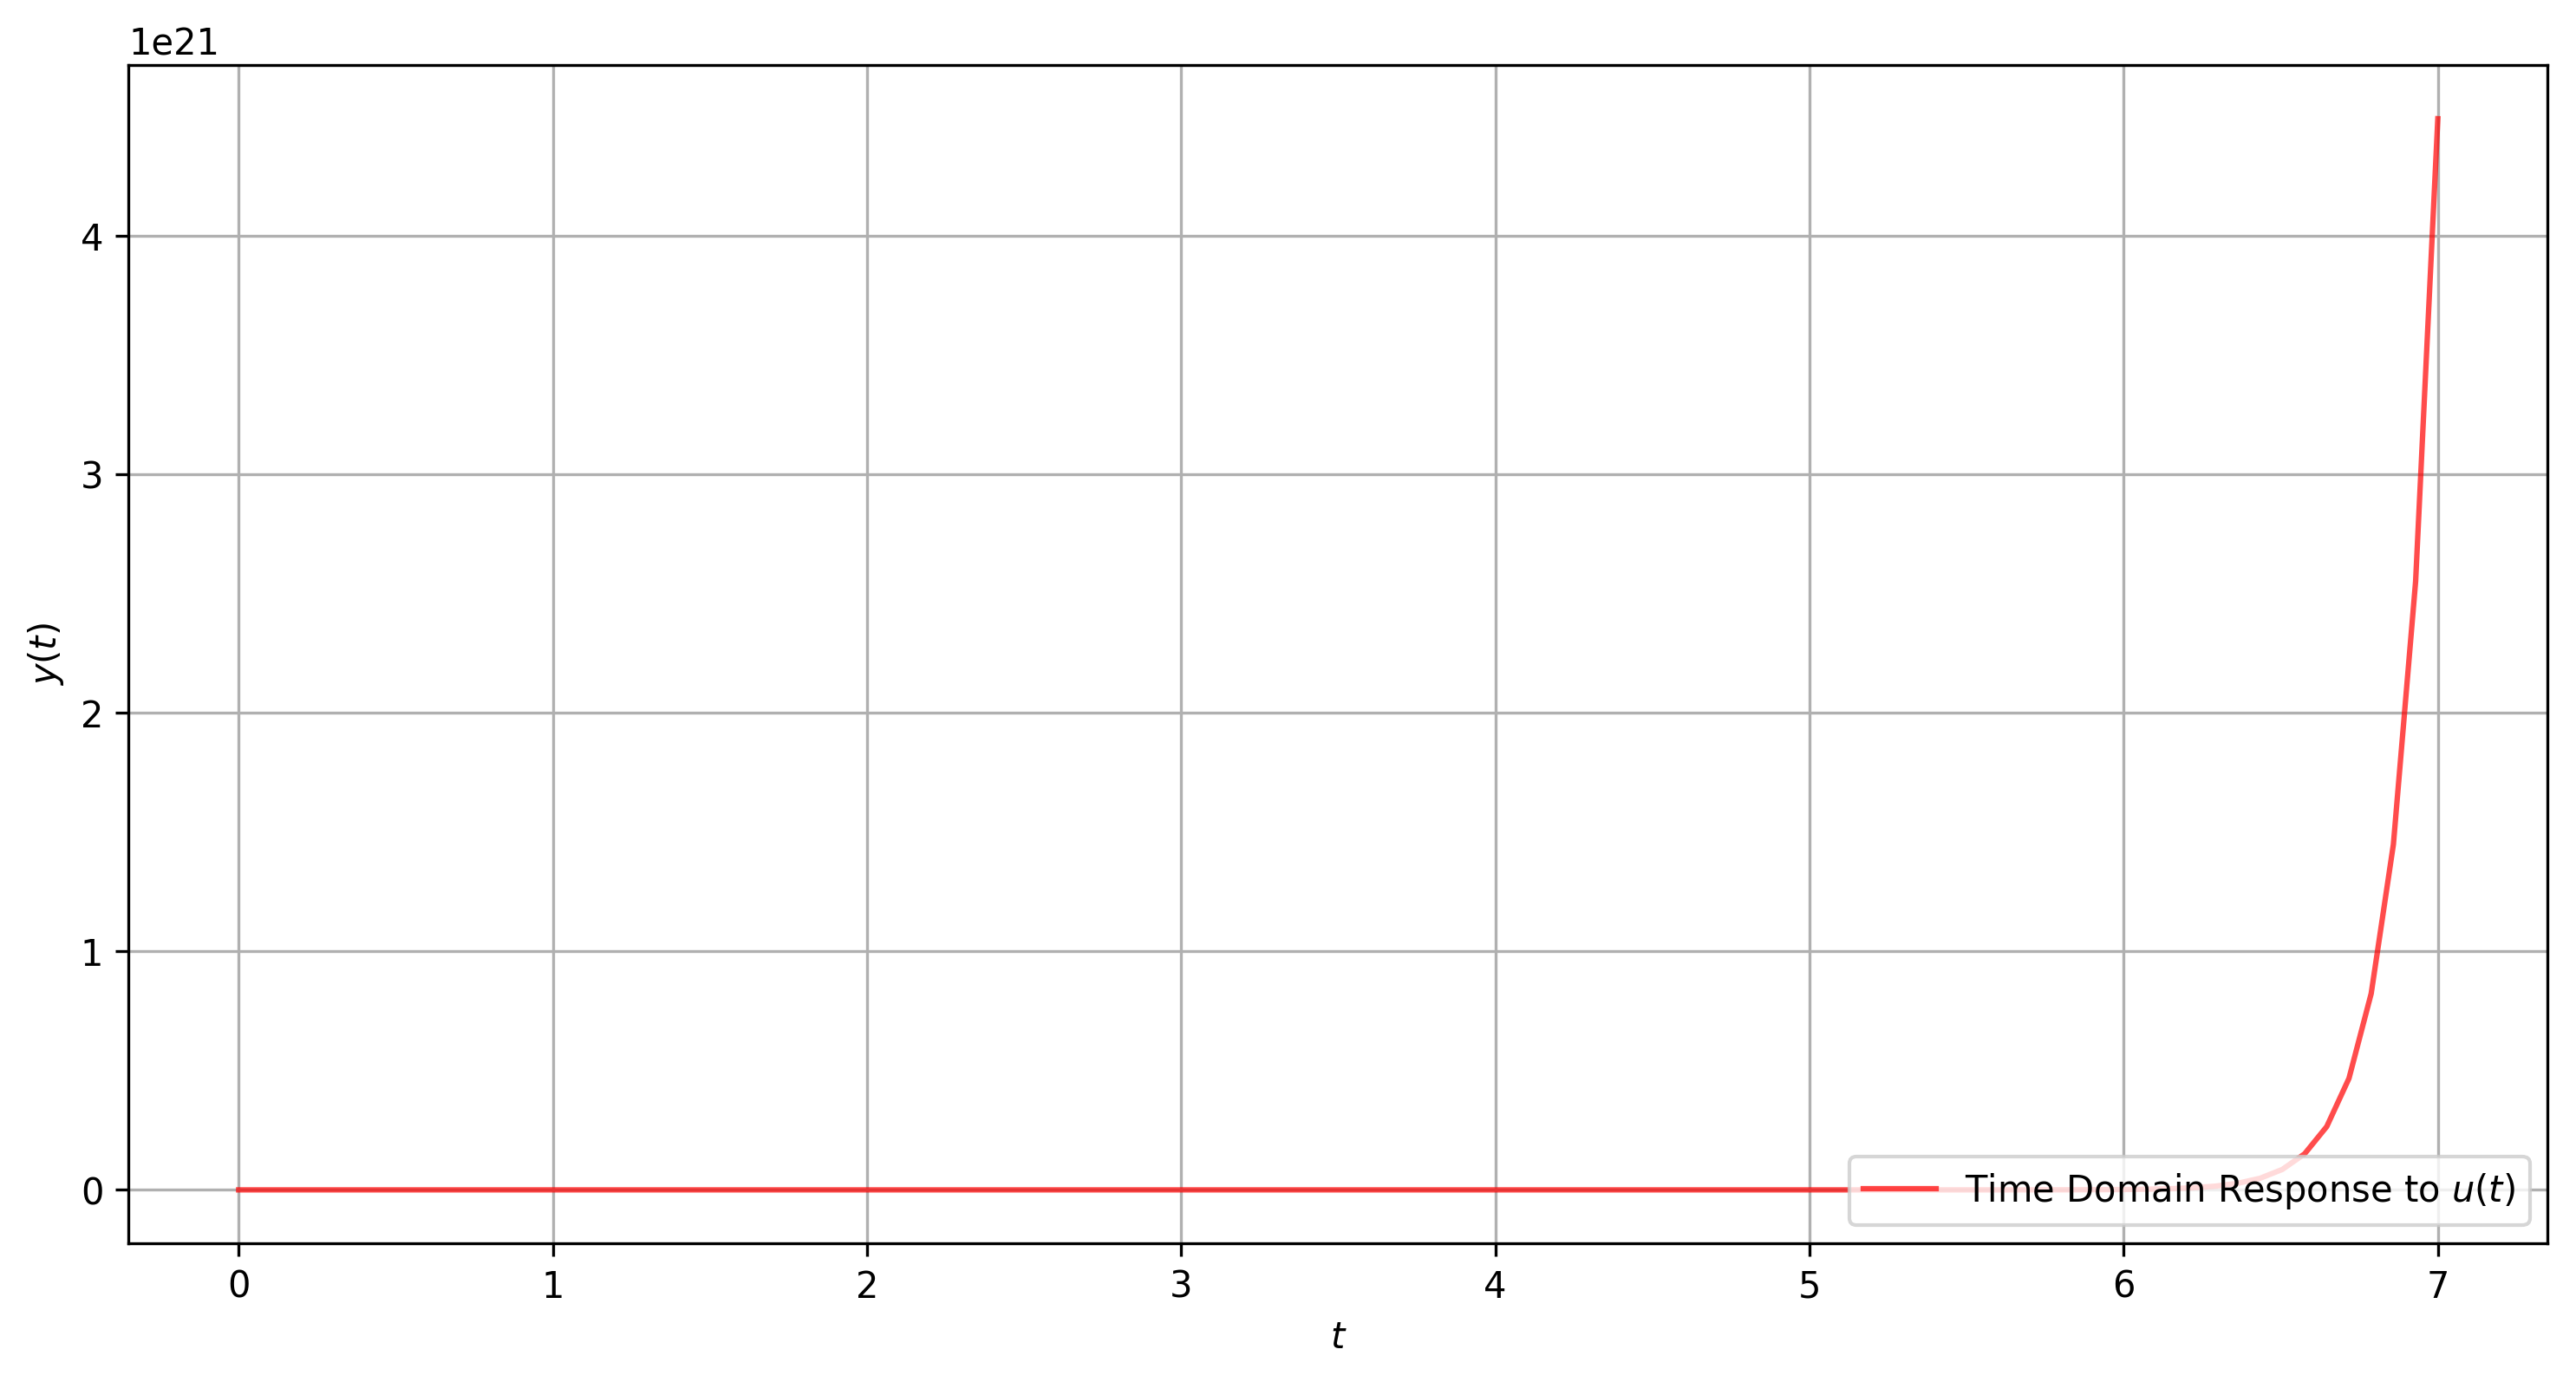

In [4]:
step_t, step_y = sig.step((top, bottom))
create_plot([step_t], [(step_y, )], ["$t$"], ["$y(t)$"],
            [("Time Domain Response to $u(t)$", )], 1, size=(12, 6))

6. The results of the graph do support my analysis of the transfer function itself. Clearly, the system is unstable as time progresses, and this is due to the positive zero. This is observed in the graph above, as for t>7, the system goes to a practical infinity, whereas if the system was stable, it would approach a bounded value, instead.

### Part 2

3. The closed-loop transfer function is derived as follows:
$$Y(s)=G(s)*(A(s)X(s)-B(s)Y(s))$$

$$Y(s)=\frac{A(s)G(s)X(s)}{B(s)G(s)+1}$$

$$\frac{Y(s)}{X(s)}=\frac{A(s)G(s)}{B(s)G(s)+1}$$

Substituting in the functions of _s_ themselves:

$$\frac{Y(s)}{X(s)}=\frac{\frac{num_A}{den_A}\cdot \frac{num_G}{den_G}}{\frac{num_B}{den_B} \cdot \frac{num_G}{den_G}+1}$$

$$\frac{Y(s)}{X(s)}=\frac{num_A num_G}{den_A den_G \cdot (\frac{num_B}{den_B} \cdot \frac{num_G}{den_G}+1)}$$

$$\frac{Y(s)}{X(s)}=\frac{num_A num_G}{den_A \cdot (num_B num_G + den_G)}$$

In [5]:
numG, denG = [1, 9], sig.convolve([1, -6, -16], [1, 4])
numA, denA = [1, 4], [1, 4, 3]
numB, denB = [1, 26, 168], [1]

top     = sig.convolve(numA, numG) # nAnG
bot_pt1 = sig.convolve(numB, numG) # nBnG
bot_pt2 = bot_pt1 + denG           # nBnG + dG
bottom  = sig.convolve(denA, bot_pt2) # dA(nBnG + dG)
print ("Numerator: ", top, "\nDenominator: ", bottom)
print ("\nPoles: ", sig.tf2zpk(top, bottom)[0], "\nZeros:", sig.tf2zpk(top, bottom)[1])

Numerator:  [ 1 13 36] 
Denominator:  [   2   41  500 2995 6878 4344]

Poles:  [-9. -4.] 
Zeros: [-5.16237064+9.51798197j -5.16237064-9.51798197j -6.17525872+0.j
 -3.        +0.j         -1.        +0.j        ]


2. This results in the following transfer function for the closed loop system:

$$H(s)=\frac{(s+9)(s+4)}{(s+(5.16+j9.52))(s+(5.16-j9.52))(s+6.17)(s+3)(s+1)}$$

3. Clearly, this system is stable, as all the zeros are negative.

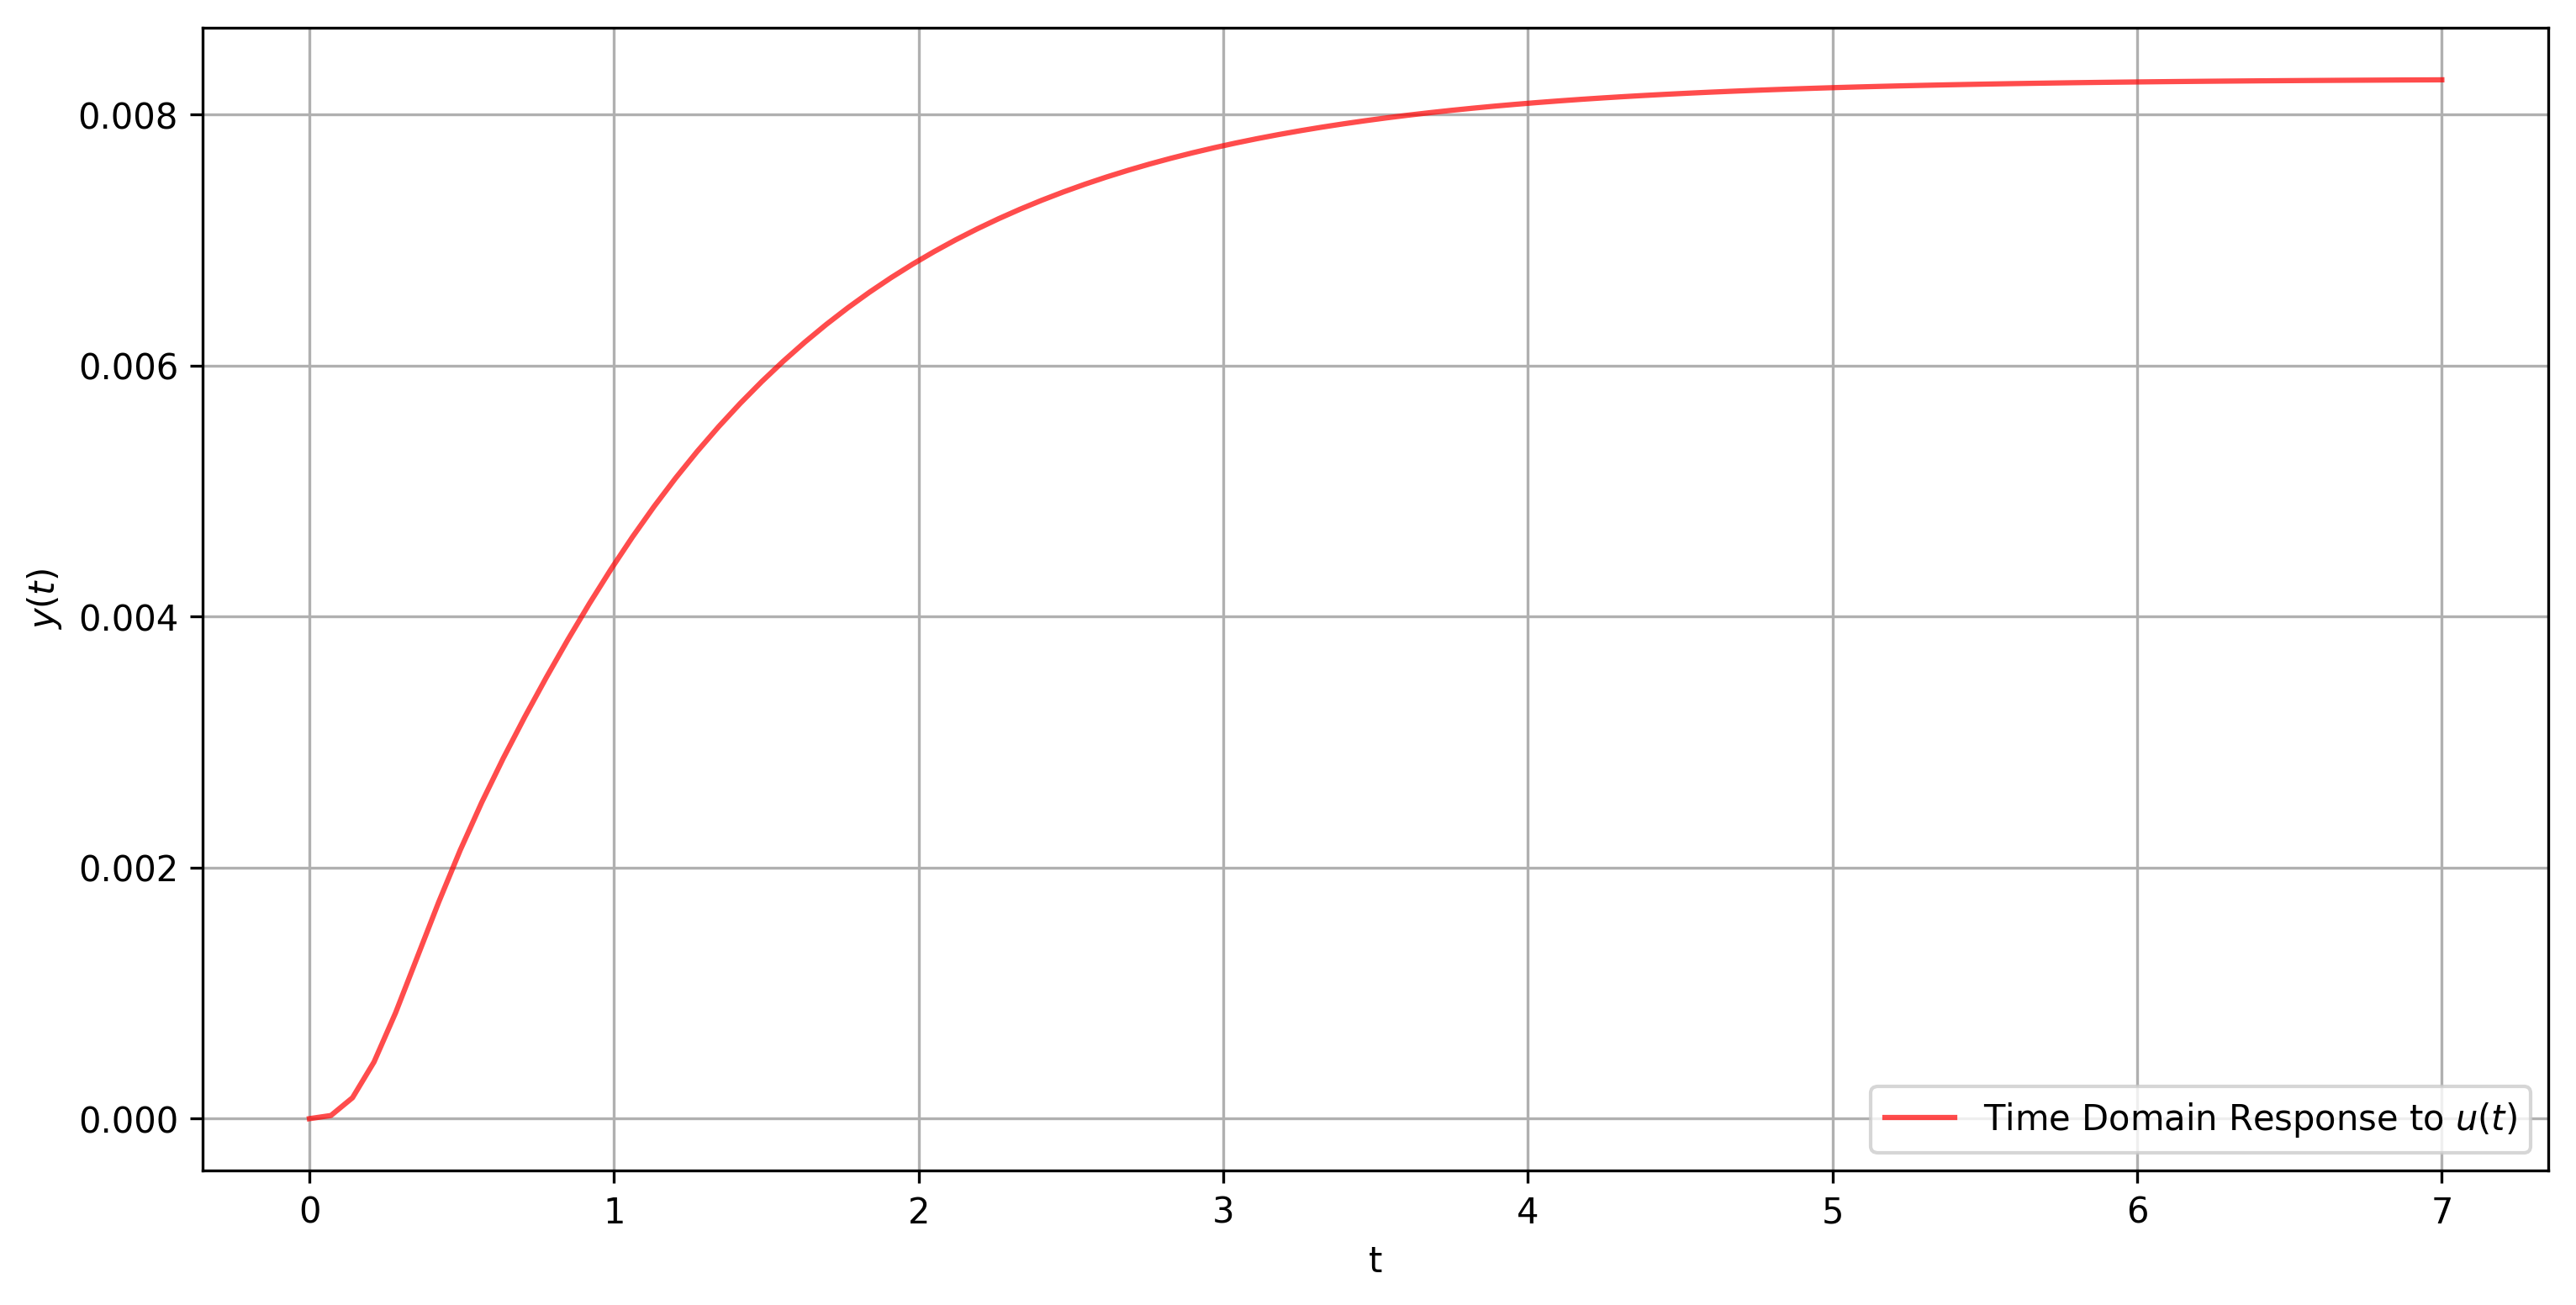

In [6]:
step_resp_t, step_resp_y = sig.step((top, bottom))
create_plot([step_resp_t], [(step_resp_y, )], ["t"], ["$y(t)$"],
            [("Time Domain Response to $u(t)$", )], 1, size=(12, 6))

5. The graphing of the step-response does indeed support my answer that the closed-loop transfer function is stable. This system clearly behaves differently than the open-loop system, as the addition of the feedback loop eliminates the positive zero that created the instability.

### Questions
1. Because all the convolution does is perform (more or less) a piece-by-piece multiplication of the two 'signals' (or in this case arrays). For time-dependent signals this is equivalent to a convolution, but for array-representations of functions, this is equivalent to distribution of the functions themselves. This would work in our user-defined function as well, because there is no technical difference between the two implementations, only in how they're interpreted (I even tested it with my own function and it worked perfectly).
2. The open-loop system does not involve $B(s)$ at all, since that is the feedback component of the system. The closed loop, on the other hand, is quite a bit more complicated because the output of the system factors into the input, and this is apparant in the difference of the two functions (and their relative complexity). With the addition of the feedback loop in the closed-loop case, the system becomes stable. The reason for this is because the feedback system, $B(s)$, cancels out the root of $(s-8)$, resulting in all of the zeros being negative.
3. The `signal.residue` function performs partial fraction decomposition on a given pair of polynomials, while the `signal.tf2zpk` function only determines the roots, leaving the polynomial in it's orignal form. In terms of implementation, I suspect that the residue function might actually use the tf2zpk function to determine the roots, and then it performs the decomposition in addition.
4. It is possible for an open-loop system to be stable. This is even evident in this lab, as the system that is only characterized by $X(s) -> A(s) -> Y(s)$ would be perfectly stable. All that's required for this is the existence of only negative zeros in the components of the system. A closed loop system can also be unstable, there is no set rule that exists for either of these cases. In the event where a closed loop system has a feedback element that amplifies the output of the other components of the system, this could certainly result in an unstable system.
5. I think this lab was not confusing at all. The concepts were somewhat tricky, especially since we've yet to learn about block diagrams or closed vs. open loop systems, so perhaps a brief introduction would have been helpful (and saved some googling). Otherwise, I have no confusion about any of the instructions.

### Conclusion
Learning about the `signal.convolve` and `signal.tf2zpk` functions was very useful, and saved me a lot of tedius time that would have been spent multiplying complex polynomials. This lab also served as a crash-course in block diagrams, which seem to be very useful for describing large systems in a non-mathematical way. The revelation the addition of the feedback element ($B(s)$) to the system changed the system's response in such a significant way was very interesting. Personally, I think the most interesting part of this lab was how the functionality of a convolution can be applied to polynomial multiplication; which was honestly pretty mind-boggling. And verifying this behavior with my own convolution function from the previous lab really emphasized this revelation.